# Given a bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.
Dataset Description: The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling Perform following steps:
1.	Read the dataset.
2.	Distinguish the feature and target set and divide the data set into training and test sets.
3.	Normalize the train and test data.
4.	Initialize and build the model. Identify the points of improvement and implement the same.
5.	Print the accuracy score and confusion matrix.
6. Try using various Activation functions.
 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt #Importing the libraries

In [2]:
df = pd.read_csv(r"D:\COLLEG_files\All_SEM_files\Sem_7\All_codes\LP_3\ML\Churn_Modelling.csv")

# Preprocessing. 

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.isnull()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis= 1) #Dropping the unnecessary columns 

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Visualization

In [13]:
def visualization(x, y, xlabel):
    plt.figure(figsize=(10,5))
    plt.hist([x, y], color=['red', 'green'], label = ['exit', 'not_exit'])
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel("No. of customers", fontsize=20)
    plt.legend()

In [14]:
df_churn_exited = df[df['Exited']==1]['Tenure']
df_churn_not_exited = df[df['Exited']==0]['Tenure']

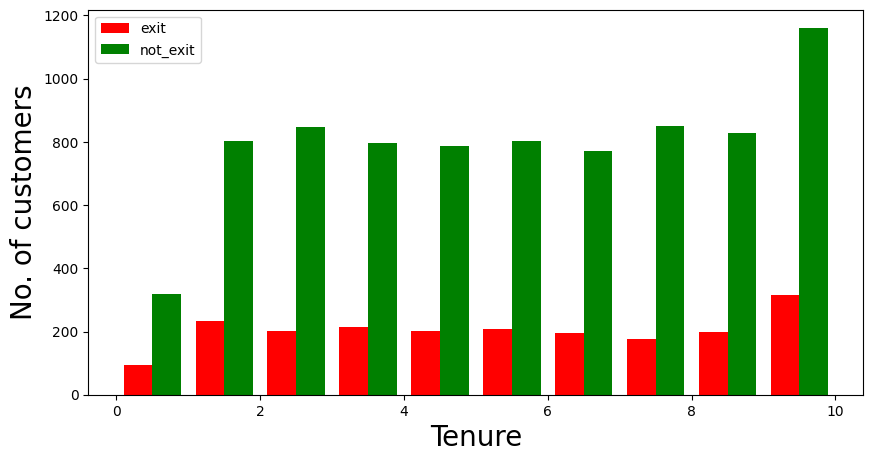

In [15]:
visualization(df_churn_exited, df_churn_not_exited, "Tenure")

In [16]:
df_churn_exited2 = df[df['Exited']==1]['Age']
df_churn_not_exited2 = df[df['Exited']==0]['Age']

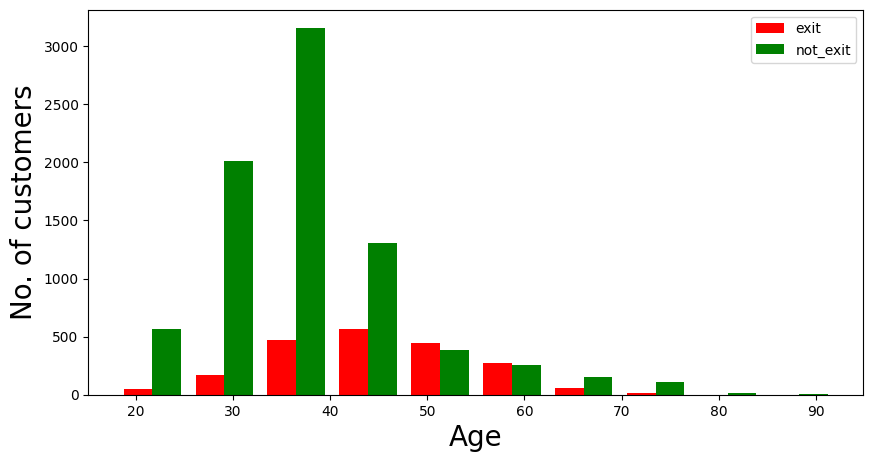

In [17]:
visualization(df_churn_exited2, df_churn_not_exited2, "Age")

# Converting the Categorical Variables

In [18]:
X = df[['CreditScore','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
states = pd.get_dummies(df['Geography'],drop_first = True)
gender = pd.get_dummies(df['Gender'],drop_first = True)

In [19]:

df = pd.concat([df,gender,states], axis = 1)

# Splitting the training and testing Dataset

In [20]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [21]:
X = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Male','Germany','Spain']]

In [22]:
y = df['Exited']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

# Normalizing the values with mean as 0 and Standard Deviation as 1

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [25]:
X_train  = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
X_train

array([[ 1.23689753, -0.1918497 , -0.01056257, ...,  0.9179271 ,
         1.71765497, -0.57537078],
       [ 1.17475823,  0.84364917, -1.39258165, ..., -1.08941113,
        -0.5821891 ,  1.73800972],
       [-1.70436259, -1.13321231,  0.68044697, ...,  0.9179271 ,
        -0.5821891 ,  1.73800972],
       ...,
       [-0.02660154, -0.1918497 ,  0.3349422 , ...,  0.9179271 ,
         1.71765497, -0.57537078],
       [ 0.28409495, -0.47425848,  0.3349422 , ..., -1.08941113,
        -0.5821891 , -0.57537078],
       [-0.09909739,  0.18469534,  0.3349422 , ...,  0.9179271 ,
        -0.5821891 , -0.57537078]])

In [27]:
X_test

array([[-1.55937089,  0.74951291,  1.02595173, ..., -1.08941113,
        -0.5821891 ,  1.73800972],
       [-0.60656832,  2.91464692, -0.01056257, ..., -1.08941113,
         1.71765497, -0.57537078],
       [ 1.38188922, -0.09771344, -1.39258165, ...,  0.9179271 ,
         1.71765497, -0.57537078],
       ...,
       [ 1.07119273, -0.38012222, -0.35606734, ..., -1.08941113,
        -0.5821891 , -0.57537078],
       [-0.16123668, -0.1918497 ,  1.3714565 , ..., -1.08941113,
         1.71765497, -0.57537078],
       [ 1.01940998,  0.46710413, -1.73808642, ..., -1.08941113,
         1.71765497, -0.57537078]])

Building the Classifier Model using ReLu and Sigmoid activation functions 

In [28]:
import keras #Keras is the wrapper on the top of tenserflow
#Can use Tenserflow as well but won't be able to understand the errors initially. 

In [29]:
from keras.models import Sequential #To create sequential neural network
from keras.layers import Dense #To create hidden layers

In [30]:
classifier = Sequential()

In [31]:
#To add the layers
#Dense helps to contruct the neurons
#Input Dimension means we have 11 features 
# Units is to create the hidden layers
#Uniform helps to distribute the weight uniformly
classifier.add(Dense(activation = "relu",input_dim = 11,units = 6,kernel_initializer = "uniform")) 

classifier.add(Dense(activation = "relu",units = 6,kernel_initializer = "uniform"))   #Adding second hidden layers

classifier.add(Dense(activation = "sigmoid",units = 1,kernel_initializer = "uniform")) #Final neuron will be having siigmoid function

classifier.compile(optimizer="adam",loss = 'binary_crossentropy',metrics = ['accuracy']) #To compile the Artificial Neural Network. Ussed Binary crossentropy as we just have only two output

classifier.summary() #3 layers created. 6 neurons in 1st,6neurons in 2nd layer and 1 neuron in last

C:\Users\varun\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121 (484.00 B)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
classifier.fit(X_train,y_train,batch_size=10,epochs=50) #Fitting the ANN to training dataset

Epoch 1/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step - accuracy: 0.7941 - loss: 0.5819
Epoch 2/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.7997 - loss: 0.4267
Epoch 3/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 695us/step - accuracy: 0.7899 - loss: 0.4323
Epoch 4/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - accuracy: 0.7898 - loss: 0.4318
Epoch 5/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - accuracy: 0.8151 - loss: 0.4194
Epoch 6/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 734us/step - accuracy: 0.8205 - loss: 0.4210
Epoch 7/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 938us/step - accuracy: 0.8319 - loss: 0.4057
Epoch 8/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step - accuracy: 0.8257 - loss: 0.4258
Epoch 9/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - accuracy: 0.8361 - loss: 0.4034
Epoch 10/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 715us/step - accuracy: 0.8359 - loss: 0.4088
Epoch 11/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step - accuracy: 0.8295 - loss: 0.4146
Epoch 12/50
700/700 ━━━━━━━━━━

In [33]:
y_pred =classifier.predict(X_test)
y_pred = (y_pred > 0.5) #Predicting the result

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step


In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cm = confusion_matrix(y_test,y_pred)

print(cm)

accuracy = accuracy_score(y_test,y_pred)

accuracy

[[2377    0]
 [ 623    0]]


0.7923333333333333

Text(95.72222222222221, 0.5, 'Truth')

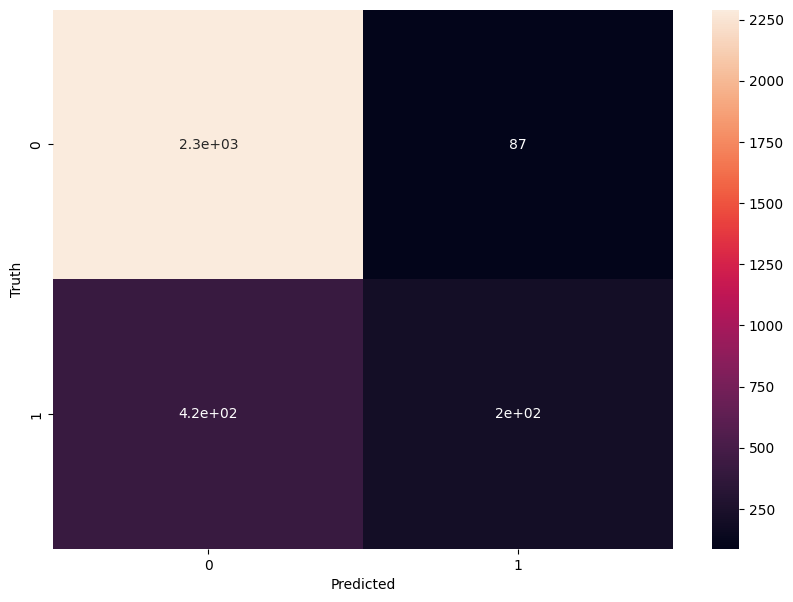

In [35]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2377
           1       0.70      0.33      0.44       623

    accuracy                           0.83      3000
   macro avg       0.77      0.64      0.67      3000
weighted avg       0.81      0.83      0.81      3000



# using RelU as the Activation func.

In [45]:
#To add the layers
#Dense helps to contruct the neurons
#Input Dimension means we have 11 features 
# Units is to create the hidden layers
#Uniform helps to distribute the weight uniformly
classifier.add(Dense(activation = "sigmoid",input_dim = 11,units = 6,kernel_initializer = "uniform")) 

classifier.add(Dense(activation = "relu",units = 6,kernel_initializer = "uniform"))   #Adding second hidden layers

classifier.add(Dense(activation = "sigmoid",units = 1,kernel_initializer = "uniform")) #Final neuron will be having siigmoid function

classifier.compile(optimizer="adam",loss = 'binary_crossentropy',metrics = ['accuracy']) #To compile the Artificial Neural Network. Ussed Binary crossentropy as we just have only two output

classifier.summary() #3 layers created. 6 neurons in 1st,6neurons in 2nd layer and 1 neuron in last

C:\Users\varun\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               7 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 6)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243 (972.00 B)

 Trainable params: 243 (972.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
classifier.fit(X_train,y_train,batch_size=10,epochs=50) #Fitting the ANN to training dataset

Epoch 1/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 986us/step - accuracy: 0.7915 - loss: 0.5854
Epoch 2/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 973us/step - accuracy: 0.7964 - loss: 0.5056
Epoch 3/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 951us/step - accuracy: 0.7954 - loss: 0.5072
Epoch 4/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8007 - loss: 0.4996
Epoch 5/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7910 - loss: 0.5127
Epoch 6/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step - accuracy: 0.8023 - loss: 0.4975
Epoch 7/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step - accuracy: 0.8035 - loss: 0.4962
Epoch 8/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step - accuracy: 0.8033 - loss: 0.4960
Epoch 9/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 943us/step - accuracy: 0.8042 - loss: 0.4950
Epoch 10/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - accuracy: 0.8114 - loss: 0.4855
Epoch 11/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step - accuracy: 0.8023 - loss: 0.4975
Epoch 12/50
700/700 ━━━━━━━━━━━━━━

In [47]:
y_pred =classifier.predict(X_test)
y_pred = (y_pred > 0.5) #Predicting the result

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cm = confusion_matrix(y_test,y_pred)

print(cm)

accuracy = accuracy_score(y_test,y_pred)

print(accuracy)

[[2377    0]
 [ 623    0]]
0.7923333333333333


Text(95.72222222222221, 0.5, 'Truth')

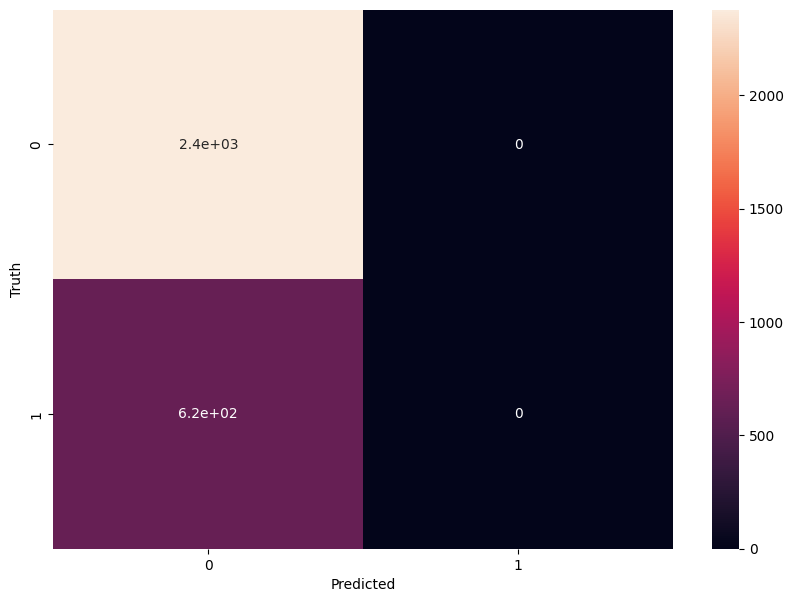

In [49]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2377
           1       0.00      0.00      0.00       623

    accuracy                           0.79      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.79      0.70      3000



C:\Users\varun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\varun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\varun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

# Using tanh as activation func

In [51]:
#To add the layers
#Dense helps to contruct the neurons
#Input Dimension means we have 11 features 
# Units is to create the hidden layers
#Uniform helps to distribute the weight uniformly
classifier.add(Dense(activation = "tanh",input_dim = 11,units = 6,kernel_initializer = "uniform")) 

classifier.add(Dense(activation = "tanh",units = 6,kernel_initializer = "uniform"))   #Adding second hidden layers

classifier.add(Dense(activation = "tanh",units = 1,kernel_initializer = "uniform")) #Final neuron will be having siigmoid function

classifier.compile(optimizer="adam",loss = 'binary_crossentropy',metrics = ['accuracy']) #To compile the Artificial Neural Network. Ussed Binary crossentropy as we just have only two output

classifier.summary() #3 layers created. 6 neurons in 1st,6neurons in 2nd layer and 1 neuron in last

C:\Users\varun\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               7 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 6)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               7 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 6)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 304 (1.19 KB)

 Trainable params: 304 (1.19 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
classifier.fit(X_train,y_train,batch_size=10,epochs=50) #Fitting the ANN to training dataset

Epoch 1/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 2s 987us/step - accuracy: 0.7969 - loss: 3.2741
Epoch 2/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 933us/step - accuracy: 0.7938 - loss: 3.3242
Epoch 3/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - accuracy: 0.8035 - loss: 3.1676
Epoch 4/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 925us/step - accuracy: 0.8069 - loss: 3.1122
Epoch 5/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - accuracy: 0.7958 - loss: 3.2908
Epoch 6/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8043 - loss: 3.1536
Epoch 7/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8030 - loss: 3.1752
Epoch 8/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7993 - loss: 3.2353
Epoch 9/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7927 - loss: 3.3410
Epoch 10/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8032 - loss: 3.1715
Epoch 11/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7928 - loss: 3.3400
Epoch 12/50
700/700 ━━━━━━━━━━━━━━━━━━━━ 1

In [53]:
y_pred =classifier.predict(X_test)
y_pred = (y_pred > 0.5) #Predicting the result

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cm = confusion_matrix(y_test,y_pred)

print(cm)

accuracy = accuracy_score(y_test,y_pred)

print(accuracy)

[[2377    0]
 [ 623    0]]
0.7923333333333333


Text(95.72222222222221, 0.5, 'Truth')

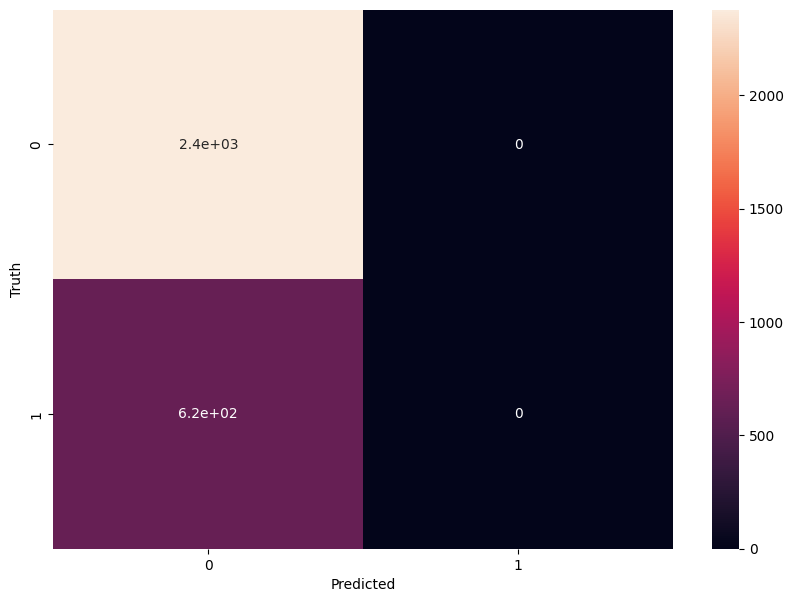

In [55]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      2377
           1       0.00      0.00      0.00       623

    accuracy                           0.79      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.79      0.70      3000



C:\Users\varun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\varun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\varun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,